## Transaction data

In [44]:
import pandas as pd

df = pd.read_csv('QVI_transaction_data.csv')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [45]:
df.shape

(264836, 8)

In [46]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [47]:
max_qty_thresh = df.PROD_QTY.quantile(0.9999)
max_qty_thresh

5.0

In [48]:
df = df[df.PROD_QTY <= max_qty_thresh]

In [49]:
df.shape

(264834, 8)

In [50]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,43464.036230,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,105.389007,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [51]:
sales_thresh = df.TOT_SALES.quantile(0.999)

In [52]:
df[df.TOT_SALES > sales_thresh].count()

DATE              238
STORE_NBR         238
LYLTY_CARD_NBR    238
TXN_ID            238
PROD_NBR          238
PROD_NAME         238
PROD_QTY          238
TOT_SALES         238
dtype: int64

In [53]:
df = df[df.TOT_SALES <= sales_thresh]

In [54]:
df.shape

(264596, 8)

In [55]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264596.000000,264596.000000,2.645960e+05,2.645960e+05,264596.000000,264596.000000,264596.000000
mean,43464.043410,135.076887,1.355465e+05,1.351552e+05,56.585825,1.903317,7.284824
std,105.357361,76.786029,8.058511e+04,7.813477e+04,32.825952,0.333045,2.480283
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002000e+04,6.759675e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303560e+05,1.351315e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030932e+05,2.026962e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,19.000000


In [56]:
df.to_csv('processed_transaction_data.csv')

## Purchase data

In [57]:
df2 = pd.read_csv('QVI_purchase_behaviour.csv')
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [58]:
df2.isna().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [59]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

pd.crosstab(df.PROD_QTY, df.TOT_SALES)

TOT_SALES,1.5,1.7,1.8,1.9,2.1,2.3,2.4,2.6,2.7,2.8,...,16.5,16.8,17.1,17.2,17.6,17.7,18.0,18.4,18.5,19.0
PROD_QTY,,,,,,,,,,,,,,,,,,,,,
1,354,708,175,930,732,186,182,1287,1229,189,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,22,0,0,9,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,10,0,6,29,0,0,35,0,0
5,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,7,0,50,31


In [63]:
pd.crosstab(df2.LIFESTAGE, df2.PREMIUM_CUSTOMER)

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2274
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


<AxesSubplot:xlabel='LIFESTAGE'>

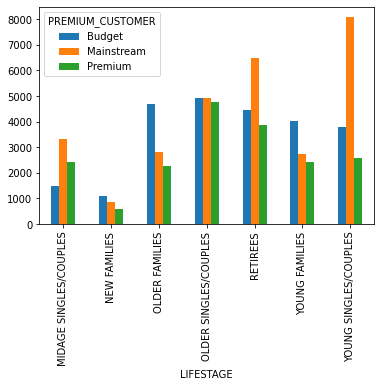

In [64]:
pd.crosstab(df2.LIFESTAGE, df2.PREMIUM_CUSTOMER).plot(kind="bar")

In [68]:
# Merging the two table now 

In [70]:
merged = pd.merge(df, df2, on='LYLTY_CARD_NBR')
merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [71]:
merged.to_csv('merged_data.csv')

<AxesSubplot:xlabel='STORE_NBR'>

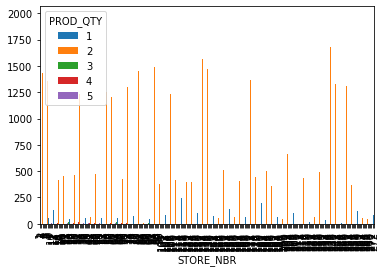

In [73]:
pd.crosstab(merged.STORE_NBR, df.PROD_QTY).plot(kind="bar")